In [85]:
import datetime as dt
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import matplotlib.dates as mdates

In [141]:
source = 'C:/Users/Mario/Downloads/Database Python.xlsx'
df=pd.read_excel(source)
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.strftime("%Y")
df['month']=df['Date'].dt.strftime("%m")
df['day']=df['Date'].dt.strftime("%d")

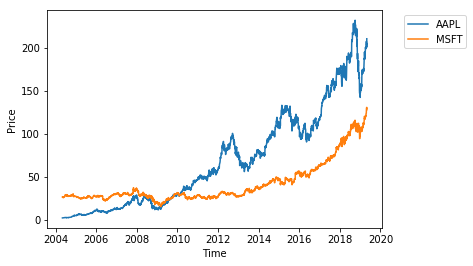

In [142]:
df.set_index('Date',inplace=True)
fig, ax = plt.subplots()
plt.plot(df['AAPL'])
plt.plot(df['MSFT'])
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

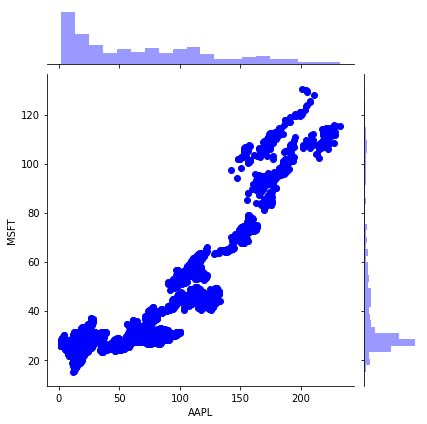

In [46]:
sns.jointplot(df['AAPL'], df['MSFT'] ,color='b')
plt.show()


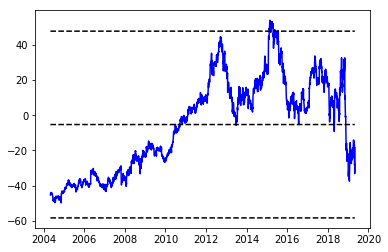

In [139]:
df1 = pd.DataFrame({'y':df['AAPL'],'x':df['MSFT']})
est = sm.OLS(df1.y,df1.x)
est = est.fit()
df1['hr'] = -est.params[0]
df1['spread'] = df1.y + (df1.x * df1.hr)
plt.plot(df1.spread , color='b')
df1['Mean']=df1["spread"].mean()
plt.plot(df1.Mean , 'k--')
df1['Up']=df1['Mean']+df1["spread"].std()*2
plt.plot(df1.Up , 'k--')
df1['Down']=df1['Mean']-df1["spread"].std()*2
plt.plot(df1.Down , 'k--')
plt.show()

In [63]:
ADF = ts.adfuller(df1.spread)
print ( 'Augmented Dickey Fuller test statistic =',ADF[0] )
print ( 'Augmented Dickey Fuller p-value =',ADF[1] )
print ( 'Augmented Dickey Fuller 1%, 5% and 10% test statistics =',ADF[4] )


Augmented Dickey Fuller test statistic = -1.8672634997621598
Augmented Dickey Fuller p-value = 0.3476145738802513
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'1%': -3.43209221904862, '5%': -2.8623098163208853, '10%': -2.5671797837779753}
